In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas_profiling
import warnings
warnings.filterwarnings('ignore')

In [2]:
movies = pd.read_csv("movies.dat" , sep= '::', names = ["MovieID","Title" , "Genres"], engine= 'python')

In [3]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings = pd.read_csv("ratings.dat" , sep= '::', names = ["UserID","MovieID" , "Rating" ,"Timestamp" ], engine= 'python')

In [5]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
users = pd.read_csv("users.dat", sep="::", names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'] , engine = 'python' )

In [7]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [8]:
ratings_user = pd.merge(ratings,users, on=['UserID'])
ratings_movie = pd.merge(ratings,movies, on=['MovieID'])

master_data = pd.merge(ratings_user,ratings_movie,
                       on=['UserID', 'MovieID', 'Rating'])[['MovieID', 'Title', 'UserID', 'Age','Genres', 'Gender', 'Occupation', "Rating"]]

master_data.head()

,MovieID,Title,UserID,Age,Genres,Gender,Occupation,Rating
0,1193,One Flew Over the Cuckoo's Nest (1975),1,1,Drama,F,10,5
1,661,James and the Giant Peach (1996),1,1,Animation|Children's|Musical,F,10,3
2,914,My Fair Lady (1964),1,1,Musical|Romance,F,10,3
3,3408,Erin Brockovich (2000),1,1,Drama,F,10,4
4,2355,"Bug's Life, A (1998)",1,1,Animation|Children's|Comedy,F,10,5


In [9]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 8 columns):
MovieID       1000209 non-null int64
Title         1000209 non-null object
UserID        1000209 non-null int64
Age           1000209 non-null int64
Genres        1000209 non-null object
Gender        1000209 non-null object
Occupation    1000209 non-null int64
Rating        1000209 non-null int64
dtypes: int64(5), object(3)
memory usage: 68.7+ MB


# Discriptive Analysis

User Age Distribution

In [45]:
labels = ['Under18', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
 master_data['age_group'] = pd.cut(master_data.Age, range(0, 81, 10), right=False, labels=labels)
master_data[['Age', 'age_group']].drop_duplicates()[:10]

,Age,age_group
0,1,0-9
53,56,50-59
182,25,20-29
233,45,40-49
452,50,50-59
523,35,30-39
1940,18,10-19


<function matplotlib.pyplot.show(*args, **kw)>

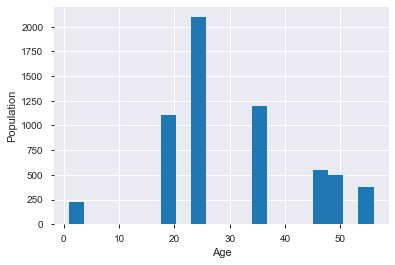

In [47]:
users['Age'].hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Population')
plt.xlim()
plt.show

**User rating of the movie “Toy Story”


In [11]:
master_data.loc[master_data['Title'].str.contains('Toy Story')]

,MovieID,Title,UserID,Age,Genres,Gender,Occupation,Rating
40,1,Toy Story (1995),1,1,Animation|Children's|Comedy,F,10,5
50,3114,Toy Story 2 (1999),1,1,Animation|Children's|Comedy,F,10,4
203,3114,Toy Story 2 (1999),3,25,Animation|Children's|Comedy,M,15,3
469,1,Toy Story (1995),6,50,Animation|Children's|Comedy,F,9,4
581,1,Toy Story (1995),8,25,Animation|Children's|Comedy,M,12,4
...,...,...,...,...,...,...,...,...
998170,1,Toy Story (1995),6032,45,Animation|Children's|Comedy,M,7,4
998360,1,Toy Story (1995),6035,25,Animation|Children's|Comedy,F,1,4
998926,3114,Toy Story 2 (1999),6036,25,Animation|Children's|Comedy,F,15,4
999583,3114,Toy Story 2 (1999),6037,45,Animation|Children's|Comedy,F,1,4


In [12]:
groupedby_movieName = master_data.groupby('Title')
groupedby_rating = master_data.groupby('Rating')

In [13]:
ToyStory2_data = groupedby_movieName.get_group('Toy Story 2 (1999)')
ToyStory_data = groupedby_movieName.get_group('Toy Story (1995)')

enter the Toy Story movie Name: Toy Story 2 (1999)


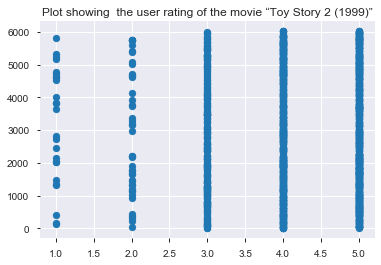

In [48]:
movie = input("enter the Toy Story movie Name:")

if movie == 'Toy Story (1995)':
    plt.scatter(ToyStory_data['Rating'],ToyStory_data['UserID'])
    plt.title('Plot showing  the user rating of the movie “Toy Story (1995)”')
    plt.show()

if movie == 'Toy Story 2 (1999)':
    plt.scatter(ToyStory2_data['Rating'],ToyStory2_data['UserID'])
    plt.title('Plot showing  the user rating of the movie “Toy Story 2 (1999)”')
    plt.show()

else:
    print("invalid entry.please enter only movie names.")

**Top 25 movies by viewership rating

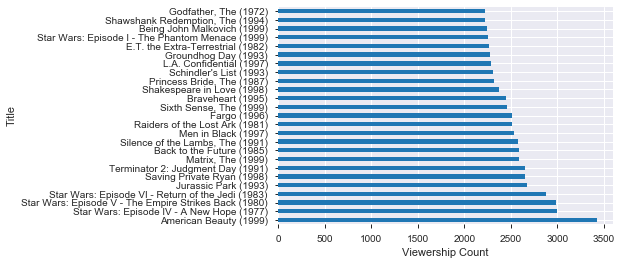

In [14]:
top_25 = master_data.groupby("Title").size().sort_values(ascending=False)[:25]
plt.ylabel("Title")
plt.xlabel("Viewership Count")
top_25.plot(kind="barh")
plt.show()

**Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [15]:
master_data[master_data.UserID == 2696]

,MovieID,Title,UserID,Age,Genres,Gender,Occupation,Rating
440667,1258,"Shining, The (1980)",2696,25,Horror,M,7,4
440668,1270,Back to the Future (1985),2696,25,Comedy|Sci-Fi,M,7,2
440669,1617,L.A. Confidential (1997),2696,25,Crime|Film-Noir|Mystery|Thriller,M,7,4
440670,1625,"Game, The (1997)",2696,25,Mystery|Thriller,M,7,4
440671,1644,I Know What You Did Last Summer (1997),2696,25,Horror|Mystery|Thriller,M,7,2
440672,1645,"Devil's Advocate, The (1997)",2696,25,Crime|Horror|Mystery|Thriller,M,7,4
440673,1805,Wild Things (1998),2696,25,Crime|Drama|Mystery|Thriller,M,7,4
440674,1892,"Perfect Murder, A (1998)",2696,25,Mystery|Thriller,M,7,4
440675,800,Lone Star (1996),2696,25,Drama|Mystery,M,7,5
440676,2338,I Still Know What You Did Last Summer (1998),2696,25,Horror|Mystery|Thriller,M,7,2


# Feature Engineering

In [16]:
master_data['Genres'].str.get_dummies('|').head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
X_features = list( master_data.columns )
X_features.remove( 'Title')
X_features.remove('Genres')
X_features.remove('Rating')
X_features

['MovieID', 'UserID', 'Age', 'Gender', 'Occupation']

In [18]:
encoded_master_data = pd.get_dummies( master_data[X_features],drop_first = True )
encoded_master_data.head()

,MovieID,UserID,Age,Occupation,Gender_M
0,1193,1,1,10,0
1,661,1,1,10,0
2,914,1,1,10,0
3,3408,1,1,10,0
4,2355,1,1,10,0


In [19]:
encoded_genres = master_data['Genres'].str.get_dummies('|')
encoded_master_data = encoded_master_data.join(encoded_genres)
encoded_master_data.head()

,MovieID,UserID,Age,Occupation,Gender_M,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1193,1,1,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,661,1,1,10,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
2,914,1,1,10,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,3408,1,1,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2355,1,1,10,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [20]:
list(encoded_master_data.columns)

['MovieID',
 'UserID',
 'Age',
 'Occupation',
 'Gender_M',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

# VIF

In [21]:
Y = master_data.Rating
X = encoded_master_data 

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.DataFrame([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

,0
MovieID,3.526917
UserID,3.582754
Age,5.920580
Occupation,2.494291
Gender_M,3.740778
Action,2.011836
Adventure,1.533467
Animation,1.714165
Children's,1.909125
Comedy,2.007625


# PCA

In [23]:
from sklearn.preprocessing import StandardScaler
# Standardizing the features
X = StandardScaler().fit_transform(X)

In [24]:
from sklearn.decomposition import PCA
pca_object = PCA(n_components=23)
principalComponents = pca_object.fit_transform(X)

In [25]:
X = pd.DataFrame(data = principalComponents)
X

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.416322,-0.990167,-0.156266,-0.719869,0.298595,-0.989824,1.517049,-1.580345,-0.276506,0.330506,...,-0.891717,1.975144,0.283219,-0.735199,0.184021,-0.025577,-0.278656,-0.227276,0.178220,-0.316122
1,5.541260,3.701648,2.597668,-2.124319,-0.990935,-2.446087,-0.338496,-1.798841,0.608558,0.127658,...,-0.736915,1.620035,0.481338,-0.256006,0.729372,0.941785,0.016579,-0.327547,0.479405,-0.177703
2,2.339998,0.329189,0.208860,-1.015102,1.326244,-2.505909,-1.620202,-1.656774,-0.298814,0.365705,...,-0.473431,1.131208,2.125922,-0.608517,1.826773,3.093867,-0.770306,0.057512,0.112619,-0.921846
3,0.450509,-1.128249,-0.180445,0.060693,-0.246405,-0.731184,2.105925,-1.284884,-0.403529,-0.033601,...,-1.400341,1.816711,0.868469,-0.119801,0.508803,0.147848,-0.136420,0.027430,0.034938,-0.229721
4,4.608344,2.469502,1.508123,0.023795,-0.017752,-0.784974,0.907416,-1.836046,0.261968,-0.107616,...,-1.304917,1.924149,-0.695360,1.054686,-0.900536,-1.865761,1.358063,-0.243020,0.257424,0.591060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,0.781145,-0.438231,-0.265301,0.848795,0.760068,0.076715,-0.250406,0.227276,0.614208,0.002885,...,0.059621,-0.198916,-0.704325,-0.650897,-0.309711,-0.075627,-0.417156,-0.114893,0.204082,-0.366889
1000205,-0.019333,-1.570451,-1.924808,-2.753542,-0.091512,-1.125455,-1.052136,0.480215,-0.445211,-0.027839,...,0.256232,-0.175968,0.524050,1.529726,0.010989,0.349801,0.633591,0.770595,-0.044710,-0.004415
1000206,0.766359,-1.202293,-0.520624,-0.270494,0.391341,0.114391,0.299714,0.105610,0.472289,-0.109072,...,-0.028240,-0.195833,-0.531512,-1.302611,-0.270411,-0.258095,-0.352383,-0.144993,0.138912,0.815974
1000207,0.086023,-1.032929,-0.179096,-0.896945,-0.396399,-0.213410,0.807954,0.459849,0.348634,-0.083556,...,-0.296546,-0.267035,0.404650,-0.953881,-0.124235,-0.275085,-0.215479,-0.226782,0.156441,-0.293435


In [26]:
var= pca_object.explained_variance_ratio_
var

array([0.09508906, 0.08640859, 0.0681923 , 0.06109586, 0.05271653,
       0.04976008, 0.04783608, 0.04628948, 0.04484476, 0.04439672,
       0.04282576, 0.04054513, 0.04047542, 0.03785863, 0.03640447,
       0.03391924, 0.03286986, 0.03217718, 0.02987598, 0.0274267 ,
       0.02022197, 0.01551751, 0.0132527 ])

In [27]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca_object.explained_variance_ratio_, decimals=4)*100)
var1

array([  9.51,  18.15,  24.97,  31.08,  36.35,  41.33,  46.11,  50.74,
        55.22,  59.66,  63.94,  67.99,  72.04,  75.83,  79.47,  82.86,
        86.15,  89.37,  92.36,  95.1 ,  97.12,  98.67, 100.  ])

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.4,random_state = 42)

In [29]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, Y_train = sm.fit_resample(X, Y)

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
import sklearn.linear_model as lm
logreg = lm.LogisticRegression()
logreg=logreg.fit(X_train , Y_train)
logreg
test_ds_predicted = logreg.predict( X_test)

In [31]:
from sklearn import metrics
log_report=print( metrics.classification_report( Y_test, test_ds_predicted ) )
log_report

              precision    recall  f1-score   support

           1       0.09      0.49      0.15     22467
           2       0.13      0.16      0.14     42834
           3       0.29      0.10      0.15    104415
           4       0.38      0.14      0.21    139464
           5       0.30      0.45      0.36     90904

    accuracy                           0.22    400084
   macro avg       0.24      0.27      0.20    400084
weighted avg       0.29      0.22      0.22    400084



# Naive Baise

In [32]:
from sklearn.naive_bayes import BernoulliNB
nb_clf = BernoulliNB()
nb_clf.fit( X_train , Y_train )
test_ds_predicted = nb_clf.predict( X_test)

In [33]:
from sklearn import metrics
nb_report=print( metrics.classification_report( Y_test, test_ds_predicted ) )
nb_report

              precision    recall  f1-score   support

           1       0.08      0.42      0.14     22467
           2       0.13      0.15      0.14     42834
           3       0.28      0.09      0.14    104415
           4       0.37      0.18      0.24    139464
           5       0.29      0.43      0.34     90904

    accuracy                           0.22    400084
   macro avg       0.23      0.25      0.20    400084
weighted avg       0.28      0.22      0.22    400084



# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='entropy')

decision_tree.fit(X_train, Y_train)
test_ds_predicted = decision_tree.predict( X_test )

In [35]:
from sklearn import metrics
decision_rprt=print( metrics.classification_report( Y_test, test_ds_predicted ) )

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     22467
           2       1.00      1.00      1.00     42834
           3       1.00      1.00      1.00    104415
           4       1.00      1.00      1.00    139464
           5       1.00      1.00      1.00     90904

    accuracy                           1.00    400084
   macro avg       1.00      1.00      1.00    400084
weighted avg       1.00      1.00      1.00    400084



# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(X_train, Y_train)
test_ds_predicted = random_forest.predict( X_test )

In [37]:
from sklearn import metrics
random_report=print( metrics.classification_report( Y_test, test_ds_predicted ) )

              precision    recall  f1-score   support

           1       0.91      0.99      0.95     22467
           2       0.93      0.98      0.95     42834
           3       0.96      0.96      0.96    104415
           4       0.98      0.96      0.97    139464
           5       0.98      0.96      0.97     90904

    accuracy                           0.96    400084
   macro avg       0.95      0.97      0.96    400084
weighted avg       0.96      0.96      0.96    400084

